Name: SOMASREE MAJUMDER


The Sparks Foundation

Graduate Rotational Internship Program (GRIP) MAY2021 Batch

Data Science & Business Analytics

Task - PREDICTION USING DESCISION TREE ALGORITHM 

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



In [3]:
# Import the needed matplotlib functionality for scatter plot visualization.
import matplotlib.pyplot as plt
# import the needed dataset.
# Import the model and an additional visualization tool.
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [5]:
data1 = pd.read_csv("/content/Iris (1).csv")#loading the data
data1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:

data1.shape

(150, 6)

In [7]:

data1.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


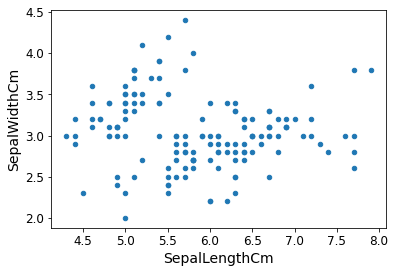

In [9]:
# scatterplot of the Iris features.
data1.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


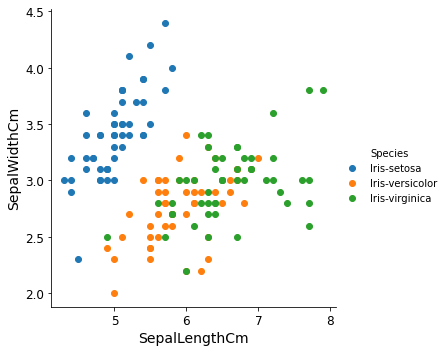

In [10]:
# FacetGrid to color the scatterplot by species
sns.FacetGrid(data1, hue="Species", size=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

In [28]:
from sklearn.tree import DecisionTreeClassifier

X = data1.data[:, 2:] # petal length and width
y = data1.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [29]:
pip install graphviz

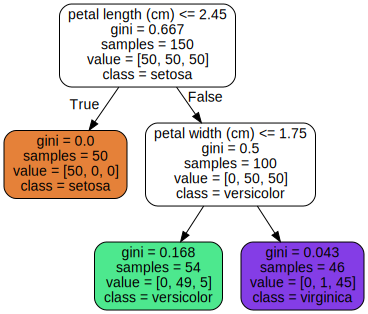

In [30]:
# to visulaize this 

import os
PROJECT_ROOT_DIR = "."
CH = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CH)
os.makedirs(IMAGES_PATH, exist_ok=True)
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CH)
os.makedirs(IMAGES_PATH, exist_ok=True)
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=data1.feature_names[2:],
        class_names=data1.target_names,
        rounded=True,
        filled=True
    )
# to save the figure
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [32]:
X = data1.data
y = data1.target

X = X[y != 0, :2]
y = y[y != 0]

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Now I am using 3 classifiers and comparing there accuracy results

In [26]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('Model Accuracy Score on totally unseen data is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.62      0.50      0.56        10
           2       0.58      0.70      0.64        10

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20

[[5 5]
 [3 7]]
Model Accuracy Score on totally unseen data is 0.6


In [27]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('Model Accuracy Score on totally unseen data is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.67      0.60      0.63        10
           2       0.64      0.70      0.67        10

    accuracy                           0.65        20
   macro avg       0.65      0.65      0.65        20
weighted avg       0.65      0.65      0.65        20

[[6 4]
 [3 7]]
Model Accuracy Score on totally unseen data(Xtest) is 0.65


In [33]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('Model Accuracy Score on  unseen data is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.83      0.50      0.62        10
           2       0.64      0.90      0.75        10

    accuracy                           0.70        20
   macro avg       0.74      0.70      0.69        20
weighted avg       0.74      0.70      0.69        20

[[5 5]
 [1 9]]
Model Accuracy Score on  unseen data is 0.7
